# Métricas para avaliação de modelos

A escolha da métrica a ser otimizada depende da aplicação!

#### Métricas para regressão

MSE (mean squared error)

$
\begin{align}
\frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
\end{align}
$

MAE (mean absolute error)

$
\begin{align}
\frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)
\end{align}
$

#### Métricas para classificação

Sejam:

$
\begin{align}
TP = true \ positives \\
TN = true \ negatives \\
FP = false \ positives \ (erro \ tipo \ I)\\
FN = false \ negatives \ (erro \ tipo \ II)
\end{align}
$

Precisão

$
\begin{align}
\frac{TP}{TP+FP}
\end{align}
$

Recall / sensibilidade

$
\begin{align}
\frac{TP}{TP+FN}
\end{align}
$

Acurácia

$
\begin{align}
\frac{TP+TN}{TP+TN+FP+FN}
\end{align}
$


F1 score: média harmônica de precisão e recall

$
\begin{align}
2 \cdot \frac{precision \cdot recall}{precision + recall}
\end{align}
$

## Validação cruzada

Consiste em particionar o dataset em k subconjuntos e treinar o modelo k vezes, usando um subconjunto diferente para validação por vez e os k-1 restantes para treino.

Vamos usar uma função auxiliar que recebe uma instância de um modelo, a quantidade de partições $k$, a matriz de *features* $X$, o vetor de *targets* $y$ e uma função que computa a métrica desejada.

Experimente variar $k$ e a função de métrica nos exemplos abaixo: classificação de flores e regressão de valores de casas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold


def train_model(model, k, X, y, score_func):
    kfolds = KFold(k)
    scores = []
    for train_idx, test_idx in kfolds.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        model = model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        scores.append(score_func(y_test, y_hat))
    print('scores: ', np.round(scores,4), '\nmean:    ', np.round(np.mean(scores),4))

#### Classificação de flores

Dataset Iris.

In [2]:
data_iris = load_iris()
df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)

X_iris = df_iris.values
y_iris = data_iris.target
cols_iris = data_iris.feature_names

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Podemos visualizar as *features* duas a duas, como no *snippet* abaixo. Experimente variar as *features* (i.e. `X_iris[:,0]` e `X_iris[:,1]`). Não se esqueça de também trocar as labels do gráfico.

Text(0, 0.5, 'sepal width (cm)')

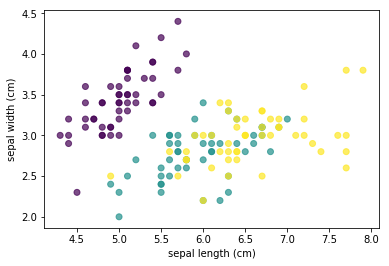

In [3]:
plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, alpha=0.7)
plt.xlabel(cols_iris[0])
plt.ylabel(cols_iris[1])

In [4]:
lr_iris = LogisticRegression(solver='lbfgs', max_iter=200, multi_class='multinomial')
train_model(lr_iris, 5, X_iris, y_iris, accuracy_score)

scores:  [1.     1.     0.8667 0.9333 0.8333] 
mean:     0.9267


#### Regressão de valores de casas

Dataset *Boston Housing*.

In [5]:
data_boston = load_boston()
df_boston = pd.DataFrame(data_boston.data, columns=data_boston.feature_names)

X_boston = df_boston.values
y_boston = data_boston.target
cols_boston = data_boston.feature_names

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Text(0, 0.5, 'ZN')

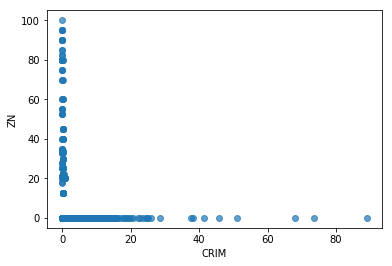

In [6]:
plt.scatter(X_boston[:,0], X_boston[:,1], alpha=0.7)
plt.xlabel(cols_boston[0])
plt.ylabel(cols_boston[1])

In [7]:
lr_boston = LinearRegression()
train_model(lr_boston, 10, X_boston, y_boston, mean_absolute_error)

scores:  [2.2069 2.8968 2.7867 4.5985 4.1099 3.5647 2.6697 9.6564 5.0227 2.5373] 
mean:     4.0049
